# 다층 퍼셉트론 손글씨 분류

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [69]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [70]:
print(digits.target[0])

0


In [71]:
print('전체 샘플 수:', len(digits.data))

전체 샘플 수: 1797


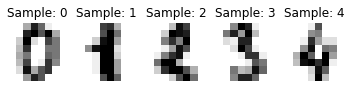

In [72]:
# 상위 5개 샘플 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Sample: %i' % digits.target[index])

In [73]:
X = digits.data
y = digits.target

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim

In [75]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10),
)

In [76]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [77]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
losses = []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch/10} Cost: {loss.item():.6f}')
    
    losses.append(loss.item())

Epoch 0.0 Cost: 2.360052
Epoch 1.0 Cost: 2.211306
Epoch 2.0 Cost: 1.399267
Epoch 3.0 Cost: 0.896545
Epoch 4.0 Cost: 0.450290
Epoch 5.0 Cost: 0.220542
Epoch 6.0 Cost: 0.189070
Epoch 7.0 Cost: 0.149399
Epoch 8.0 Cost: 0.518952
Epoch 9.0 Cost: 0.114140


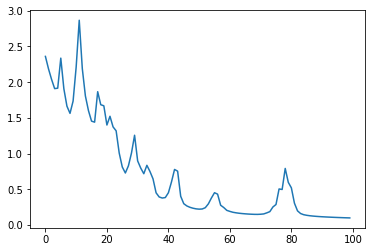

In [78]:
plt.plot(losses)